<a href="https://colab.research.google.com/github/SurekhaBerlin/Quantium-Data-Analysis-Project/blob/main/QuantiumRetailAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUANTIUM RETAIL ANALYTICS
PROJECT OVERVIEW:


Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.



AIM:
1. Creating and interpreting high-level summaries of the data
2. Finding outliers and removing these (if applicable)
3. Checking data formats and correcting (if applicable)

## STEP 0 : Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('/content/QVI_purchase_behaviour.csv')
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
#Transactiondata is in Excel format
transaction_df = pd.read_excel('/content/QVI_transaction_data.xlsx')
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## STEP 1: Data Understanding

In [4]:
customer_df.shape

(72637, 3)

In [5]:
transaction_df.shape

(264836, 8)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
transaction_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [9]:
customer_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [10]:
customer_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

## STEP 2: Data Preparation

Need to perform the following steps to clean this data.
1. Checking for duplicates and removing it
2. Checking for null values and removing it
3. Dropping irrelevant rows and columns
4. Date is in non-numeric format. As excel records the dates from the beginning of 30-Dec-1899. We create python readable date column (Date_New) using DATE column.


In [11]:
transaction_df['Date_New'] = pd.to_datetime(transaction_df['DATE'],unit='D',origin='1899-12-30')

In [12]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_New
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


In [13]:
# Finding the duplicates
duplicates = customer_df.duplicated().sum()
duplicates

0

In [14]:
# Finding the duplicates
duplicates = transaction_df.duplicated().sum()


In [15]:
# Finding the null values in the CustomerID
customer_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [16]:
# Finding the null values in the CustomerID
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
Date_New          0
dtype: int64

* There are no null values or duplicates


In [17]:
customer_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [18]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Date_New
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,2018-12-30 00:52:12.879215616
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,2018-07-01 00:00:00
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,2018-09-30 00:00:00
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,2018-12-30 00:00:00
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,2019-03-31 00:00:00
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019-06-30 00:00:00
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,NaN


## STEP 3: Data Modelling
1. Renaming columns
2. Feature Creation
3. Finding the outlier

* With Date field corrected, we can start examining the transaction data.
* First step is to identify high demand products.
* Tabulation of product name (PROD_NAME).

In [19]:
transaction_df['PROD_NAME'].describe()


count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [20]:
transaction_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [21]:
prod = transaction_df['PROD_NAME'].value_counts().reset_index()
prod

,PROD_NAME,count
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


In [22]:
prod.rename(columns={'PROD_NAME':'PRODUCT','count':'COUNT'},inplace=True)

In [23]:
prod

,PRODUCT,COUNT
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


* There are 114 types of products (at times, same/similar products may be worded differntly). Let's figure it out!

* First removing digits from the Product field. Then removing the special charactes like &.

In [24]:
prod['PRODUCT'] = prod['PRODUCT'].str.replace('\d+','')
prod['PRODUCT'] = prod['PRODUCT'].str.replace('[#,@,&,/]','')

In [25]:
prod['PRODUCT'].value_counts()

PRODUCT
Kettle Mozzarella   Basil & Pesto 175g     1
RRD Salt & Vinegar  165g                   1
Smiths Crinkle Cut  Chips Chs&Onion170g    1
WW Sour Cream &OnionStacked Chips 160g     1
Smiths Crinkle Cut  Chips Chicken 170g     1
                                          ..
Tostitos Smoked     Chipotle 175g          1
Kettle Tortilla ChpsBtroot&Ricotta 150g    1
Kettle Honey Soy    Chicken 175g           1
Cheezels Cheese 330g                       1
WW Crinkle Cut      Original 175g          1
Name: count, Length: 114, dtype: int64

In [26]:
prod_name_freq = prod['PRODUCT'].str.split(expand=True).stack().value_counts()

In [27]:
prod_name_freq.head(20)

175g        26
Chips       21
150g        19
&           17
Smiths      16
Cut         14
Crinkle     14
Kettle      13
Cheese      12
Salt        12
Original    10
Doritos      9
Chip         9
Salsa        9
RRD          8
170g         8
Corn         8
Pringles     8
134g         8
165g         8
Name: count, dtype: int64

In [28]:
prod.head(5)

,PRODUCT,COUNT
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265


## Findings
* Out of 114 product names, 105 contain weight in grams
* 21 have 'Chips' in name and 9 have 'Chip'
* There are 9 product names with 'Salsa'

In [29]:
chip_tran = transaction_df[transaction_df['PROD_NAME'].str.contains('Chip',regex=False)]

In [30]:
chip_tran.shape

(74570, 9)

In [31]:
chips_tran = transaction_df[transaction_df['PROD_NAME'].str.contains('Chips',regex=False)]

In [32]:
chips_tran.shape

(49770, 9)

In [33]:
non_salsa = transaction_df[~transaction_df['PROD_NAME'].str.contains('Salsa',regex=False)]

In [34]:
transaction_df.shape

(264836, 9)

* If we were to create a sub sample of only the Product Names containing 'Chip', we would get 74,570 transactions. However, if we were to remove the product names containing 'Salsa', we get 264,836 transactions.

* Note: Take a call on removing 'salsa' or keeping only 'chip'

* For now, lets work on dataset, after removing 'Salsa' products

In [35]:

non_salsa.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Date_New
count,246742.000000,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742
mean,43464.054875,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,2018-12-30 01:19:01.211467520
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,2018-07-01 00:00:00
25%,43373.000000,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,2018-09-30 00:00:00
50%,43464.000000,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,2018-12-30 00:00:00
75%,43555.000000,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,2019-03-31 00:00:00
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019-06-30 00:00:00
std,105.396691,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,NaN


In [36]:
non_salsa.isnull().sum()  # No null values in non_salsa data

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
Date_New          0
dtype: int64

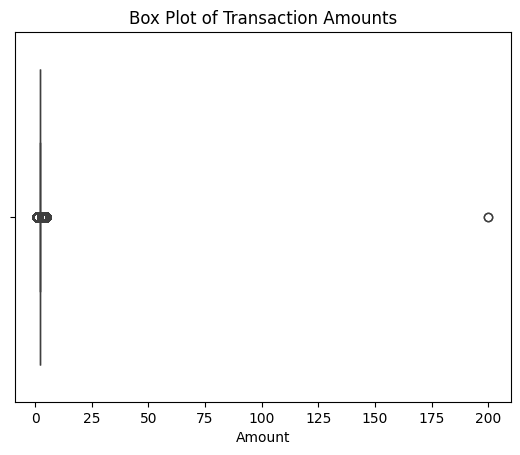

In [37]:
# Assuming your DataFrame has a column 'amount' which contains transaction amounts
sns.boxplot(x='PROD_QTY', data=transaction_df)
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

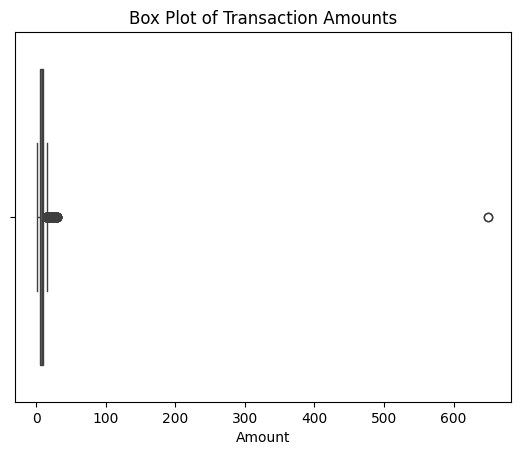

In [38]:
# Assuming your DataFrame has a column 'amount' which contains transaction amounts
sns.boxplot(x='TOT_SALES', data=transaction_df)
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

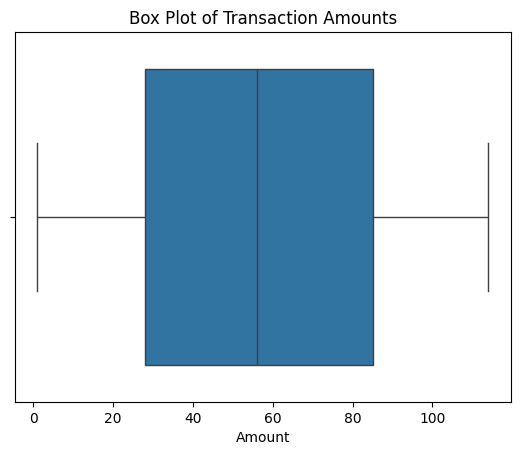

In [39]:
# Assuming your DataFrame has a column 'amount' which contains transaction amounts
sns.boxplot(x='PROD_NBR', data=transaction_df)
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

<ipython-input-40-37a82888b8e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=non_salsa['PROD_QTY'],orient='h',palette='Set2')


<Axes: xlabel='PROD_QTY'>

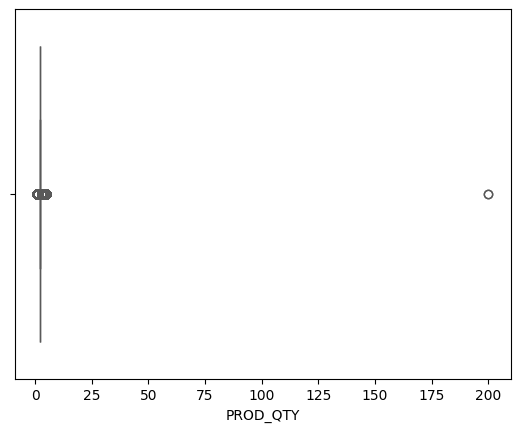

In [40]:
sns.boxplot(data=non_salsa['PROD_QTY'],orient='h',palette='Set2')

There are only few transactions greater than 200 quantity

<Axes: title={'center': 'TOT_SALES'}, xlabel='PROD_QTY'>

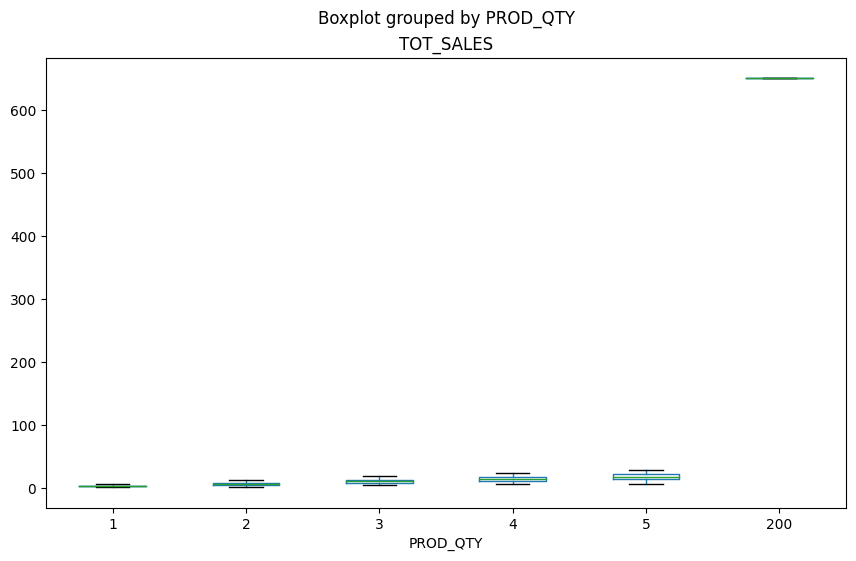

In [41]:
non_salsa.boxplot(by='PROD_QTY',column=['TOT_SALES'],grid = False,figsize=(10,6))

In [42]:
# Lets investigate the orders with quantity higher than 100 in a transaction.
non_salsa[non_salsa['PROD_QTY'] >= 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_New
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


We have only 2 transactions which is having more than 200 transactions, so we can drop these 2 as an outlier

In [43]:
new_non_salsa = non_salsa[non_salsa['LYLTY_CARD_NBR']!= 226000]

<Axes: title={'center': 'TOT_SALES'}, xlabel='PROD_QTY'>

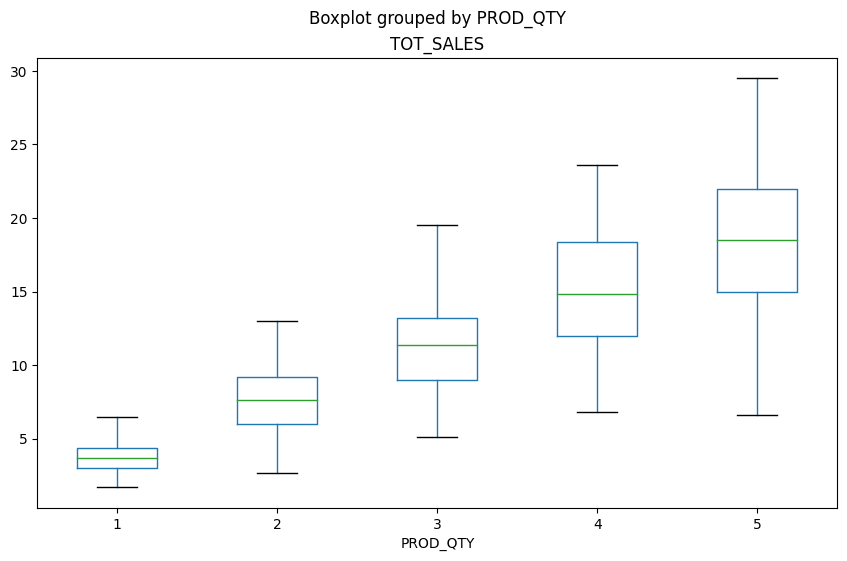

In [44]:
new_non_salsa.boxplot(by='PROD_QTY',column=['TOT_SALES'],grid=False,figsize=(10,6))

* Now we removed the outliers in the non salsa Product and there are no more outliers in the PROD_QTY!

* Let's summaries the data, and finding the Count of daily number of transactions recorded

In [45]:
dfcounts = new_non_salsa.groupby('Date_New').count()  # Count daily number of transactions recorded
dfcounts

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
Date_New,,,,,,,,
2018-07-01,663,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673,673


In [46]:
rng = pd.date_range('2018-07-01',periods=365,freq='D')
df = pd.DataFrame({'Date':rng,'Val':0})
df.set_index(pd.to_datetime(df['Date']),inplace=True)
df


,Date,Val
Date,,
2018-07-01,2018-07-01,0
2018-07-02,2018-07-02,0
2018-07-03,2018-07-03,0
2018-07-04,2018-07-04,0
2018-07-05,2018-07-05,0
...,...,...
2019-06-26,2019-06-26,0
2019-06-27,2019-06-27,0
2019-06-28,2019-06-28,0


In [47]:
merge = pd.merge(df,dfcounts,how='outer',left_index=True, right_index=True)
merge

,Date,Val,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,2018-07-01,0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0
2018-07-02,2018-07-02,0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0
2018-07-03,2018-07-03,0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0
2018-07-04,2018-07-04,0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2018-07-05,2018-07-05,0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0
...,...,...,...,...,...,...,...,...,...,...
2019-06-26,2019-06-26,0,657.0,657.0,657.0,657.0,657.0,657.0,657.0,657.0
2019-06-27,2019-06-27,0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2019-06-28,2019-06-28,0,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.0
2019-06-29,2019-06-29,0,703.0,703.0,703.0,703.0,703.0,703.0,703.0,703.0


In [48]:
merge[merge.isnull().any(axis=1)]

,Date,Val,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-12-25,2018-12-25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
merge_without_null = merge[~merge.isnull().any(axis=1)]


In [50]:
print("Shape of original DataFrame:", merge.shape)
print("Shape after removing rows with null values:", merge_without_null.shape)

Shape of original DataFrame: (365, 10)
Shape after removing rows with null values: (364, 10)


<BarContainer object of 365 artists>

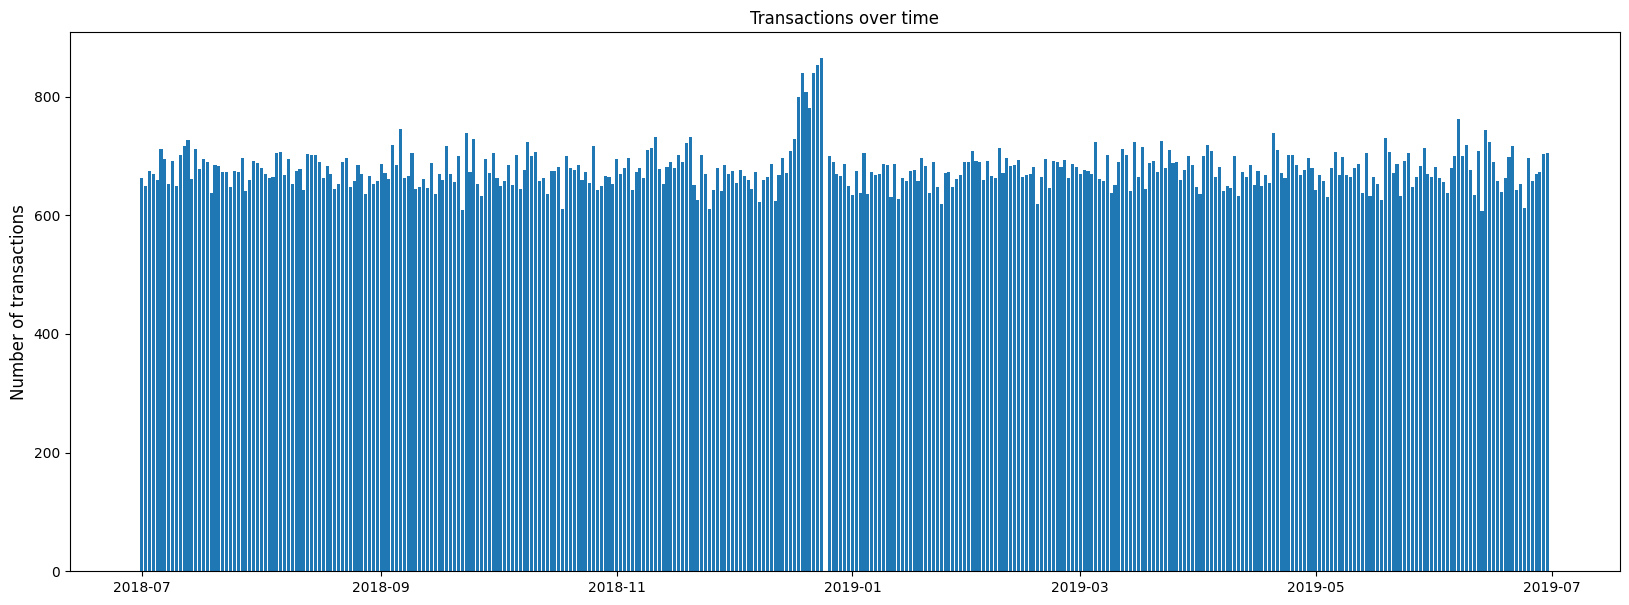

In [51]:

plt.figure(figsize=(20,7))
plt.title('Transactions over time',fontsize=12)
plt.ylabel('Number of transactions',fontsize=12)
plt.bar(x=merge['Date'],height=merge['DATE'])


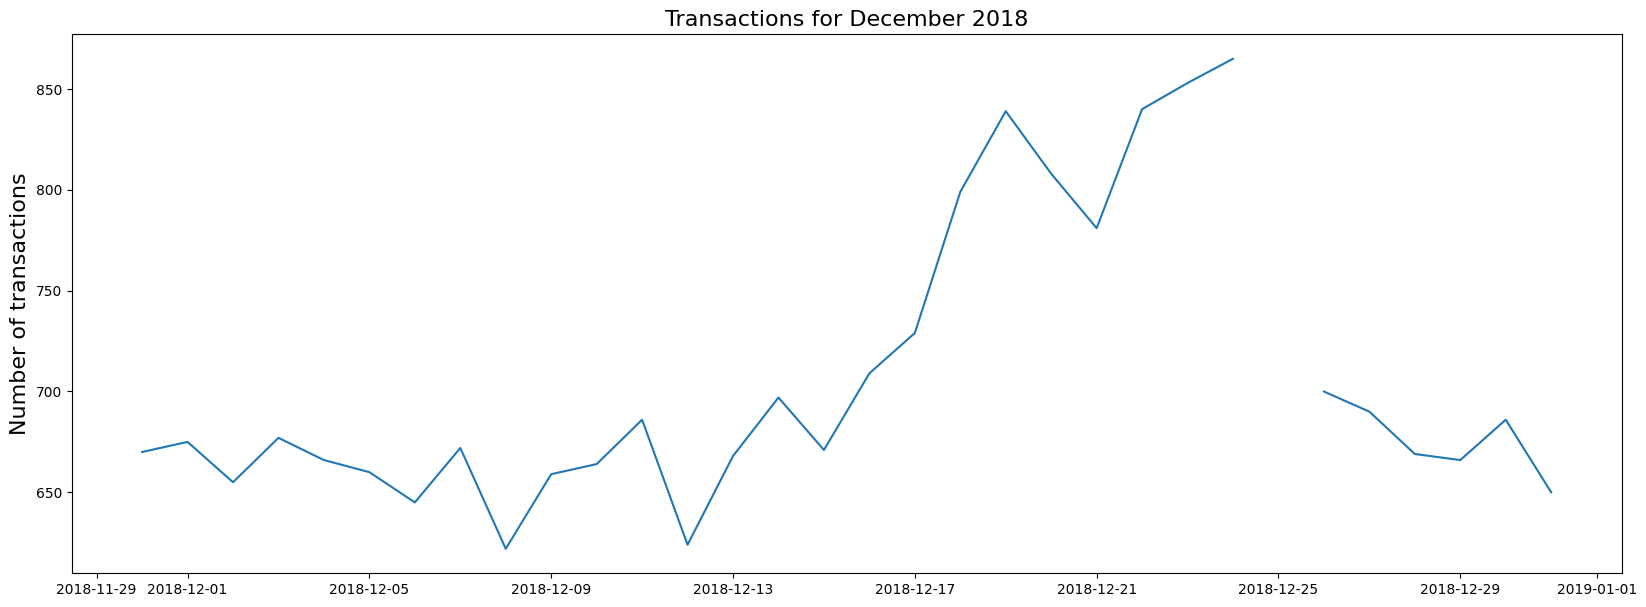

In [52]:

 #Zoom in the December 2018 data, to investigate the break

plt.figure(figsize=(20,7))
plt.title('Transactions for December 2018', fontsize=16)
plt.ylabel('Number of transactions', fontsize=16)
plt.plot(merge['Date']['20181130':'20181231'],merge['DATE']['20181130':'20181231'])


In [53]:
new_non_salsa['size'] = new_non_salsa['PROD_NAME'].str.extract('(\d+)')  # Get Packsizes from Prod_Name



<ipython-input-53-5b266675e60c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_non_salsa['size'] = new_non_salsa['PROD_NAME'].str.extract('(\d+)')  # Get Packsizes from Prod_Name


In [54]:
new_non_salsa['size'].value_counts() # Check if pack size is reasonable

size
175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

<Axes: >

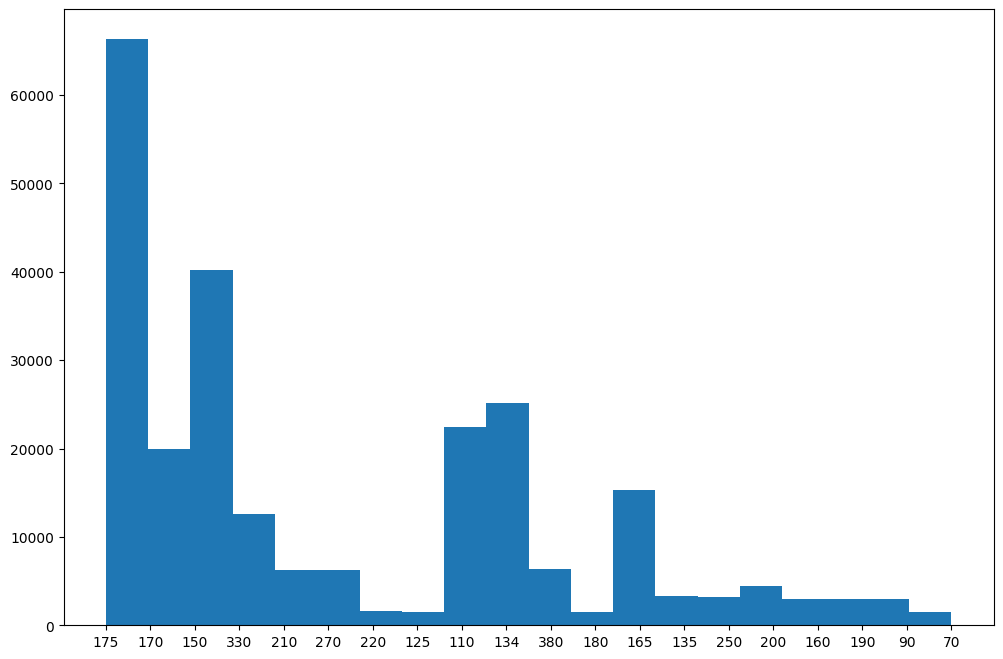

In [55]:
# Plotting the Package size, frequencies.

new_non_salsa['size'].hist(bins=20,grid=False,figsize=(12,8))


In [56]:
new_non_salsa['size'].unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       '90', '70'], dtype=object)

## Findings

* Packages with 175g weight are bought more frequently, followed by 150g, 134g, 110g, 165g and so on

* Let us now investigate the brand, extracted as a first word from the PROD_NAME column.

In [57]:
new_non_salsa['BRAND'] = new_non_salsa['PROD_NAME'].str.split(' ').str[0]
new_non_salsa.head()

<ipython-input-57-ffbd3cd8b8fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_non_salsa['BRAND'] = new_non_salsa['PROD_NAME'].str.split(' ').str[0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_New,size,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle


In [58]:

new_non_salsa['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

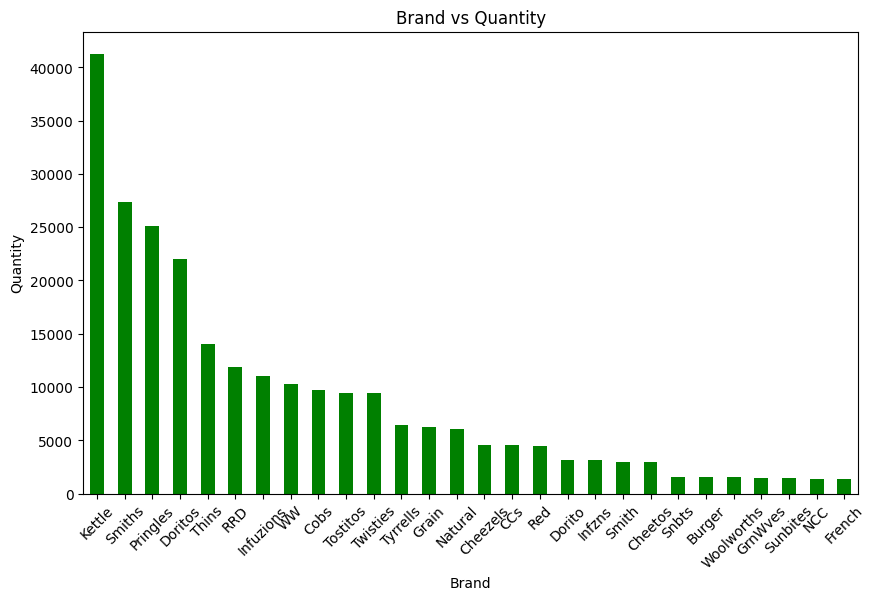

In [59]:
import matplotlib.pyplot as plt
brand_counts = new_non_salsa['BRAND'].value_counts()
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='green')
plt.title('Brand vs Quantity')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


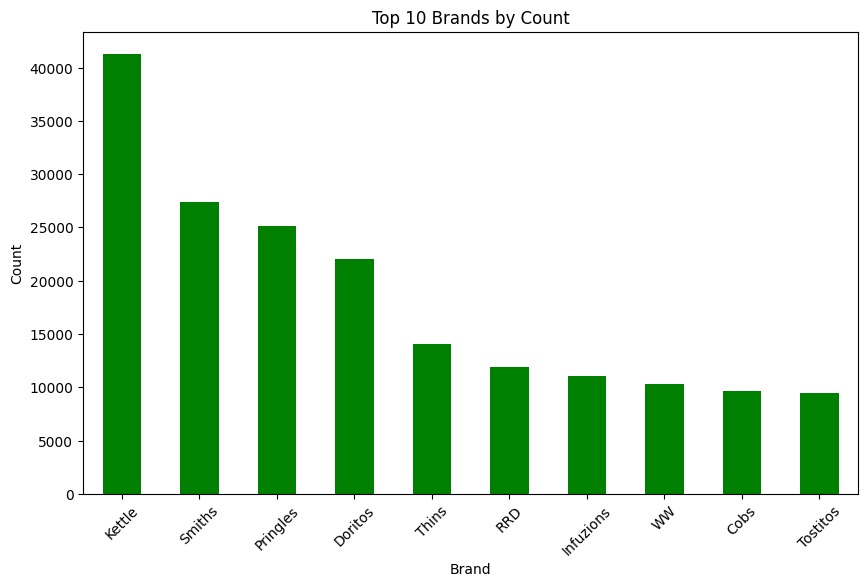

In [60]:
import matplotlib.pyplot as plt
top_10_brands = brand_counts.head(10)
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='green')
plt.title('Top 10 Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Findings

* Brands with higest transactions are Kettle, Smiths,Pringles, Doritos

* Now, let us evaluate consumer data for data cleaning exercise

In [61]:
customer_df.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
33649,123356,MIDAGE SINGLES/COUPLES,Premium
69701,261143,MIDAGE SINGLES/COUPLES,Mainstream
64461,241206,MIDAGE SINGLES/COUPLES,Mainstream
27217,99217,RETIREES,Premium
27339,100093,YOUNG SINGLES/COUPLES,Mainstream
20986,77016,OLDER SINGLES/COUPLES,Budget
35070,129059,MIDAGE SINGLES/COUPLES,Mainstream
67612,253221,OLDER SINGLES/COUPLES,Mainstream
8132,29095,MIDAGE SINGLES/COUPLES,Premium
45109,169236,OLDER FAMILIES,Mainstream


In [62]:
customer_df['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

## Findings

* Most of the customers are retirees, followed by older singles/couples.
* Size of the new families is the least.

In [63]:
customer_df['PREMIUM_CUSTOMER'].value_counts()


PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

## Findings

* As expected, premium customers are less in number. However, it is not a simple pyramid structure, as the size of Mainstream customers (middle income class) is bigger than budget category.

In [64]:
# Check if any of the Customer number is duplicate in the dataset.
df['is_duplicated'] = customer_df.duplicated('LYLTY_CARD_NBR')
df['is_duplicated'].sum()


0

In [65]:

#left merge  #Merging botht the datasets
merged = pd.merge(new_non_salsa, customer_df,how="left", on=["LYLTY_CARD_NBR"])
merged.shape

(246740, 13)

In [66]:
merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_New,size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [67]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  int64         
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   Date_New          246740 non-null  datetime64[ns]
 9   size              246740 non-null  object        
 10  BRAND             246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memor

In [68]:
merged['DATE'] = merged['Date_New']
merged.drop(['Date_New'],axis=1, inplace=True)


In [69]:

merged.to_csv(r'QVI_data.csv', index = False)


After data cleaning process, Let's now do the Analysis of Customer Behaviour.

To find answers to questions like:

1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

2. How many customers are in each segment

3. How many chips are bought per customer by segment

4. What's the average chip price by customer segment

In [70]:
df = pd.read_csv('/content/QVI_data.csv')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [71]:
df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()

DATE  \
PREMIUM_CUSTOMER LIFESTAGE                                                                   
Budget           MIDAGE SINGLES/COUPLES  2019-05-142019-05-202018-08-172018-08-182019-0...   
                 NEW FAMILIES            2019-05-192019-05-142018-08-192018-08-142019-0...   
                 OLDER FAMILIES          2018-07-212019-05-202018-08-172018-08-142019-0...   
                 OLDER SINGLES/COUPLES   2018-08-182019-05-152019-05-192018-08-142018-0...   
                 RETIREES                2018-11-182018-11-292018-08-172019-05-182019-0...   
                 YOUNG FAMILIES          2018-08-202019-05-142018-08-152019-05-192019-0...   
                 YOUNG SINGLES/COUPLES   2018-11-092019-05-162019-05-172018-08-162019-0...   
Mainstream       MIDAGE SINGLES/COUPLES  2019-05-182019-05-162018-08-182019-05-192018-0...   
                 NEW FAMILIES            2018-08-152018-08-182018-08-202019-05-202018-0...   
                 OLDER FAMILIES          2019-06-212018-08-172019-05-162019-05-162019-0...   
                 OLDER SINGLES/COUPLES   2018-11-092018-11-102018-08-152019-05-142018-0...   
                 RETIREES                2019-05-142019-05-192018-08-152019-05-182018-0...   
                 YOUNG FAMILIES          2018-08-182018-08-202019-05-202019-05-202018-0...   
                 YOUNG SINGLES/COUPLES   2018-08-162018-08-172018-08-142019-05-152019-0...   
Premium          MIDAGE SINGLES/COUPLES  2019-05-172019-05-192018-08-162018-08-182018-0...   
                 NEW FAMILIES            2019-06-152019-06-272018-08-152019-05-162019-0...   
                 OLDER FAMILIES          2018-08-182018-08-202019-05-152019-05-172019-0...   
                 OLDER SINGLES/COUPLES   2019-05-162018-08-142018-08-152019-05-172019-0...   
                 RETIREES                2018-07-022018-08-142018-08-172019-05-202019-0...   
                 YOUNG FAMILIES          2019-05-182019-05-202018-08-142018-08-162018-0...   
                 YOUNG SINGLES/COUPLES   2018-10-172019-06-062019-05-142018-08-142019-0...   

                                         STORE_NBR  LYLTY_CARD_NBR  \
PREMIUM_CUSTOMER LIFESTAGE                                           
Budget           MIDAGE SINGLES/COUPLES     641330       644440514   
                 NEW FAMILIES               380365       380867986   
                 OLDER FAMILIES            2881588      2891942530   
                 OLDER SINGLES/COUPLES     2318353      2332495098   
                 RETIREES                  1917631      1927702126   
                 YOUNG FAMILIES            2410844      2415761554   
                 YOUNG SINGLES/COUPLES     1154509      1158321877   
Mainstream       MIDAGE SINGLES/COUPLES    1496281      1500774290   
                 NEW FAMILIES               287481       288014877   
                 OLDER FAMILIES            1780625      1782766792   
                 OLDER SINGLES/COUPLES     2265662      2279764274   
                 RETIREES                  2745301      2753153856   
                 YOUNG FAMILIES            1634618      1641169212   
                 YOUNG SINGLES/COUPLES     2624060      2637061979   
Premium          MIDAGE SINGLES/COUPLES    1033933      1039707670   
                 NEW FAMILIES               201835       202109224   
                 OLDER FAMILIES            1403359      1404881088   
                 OLDER SINGLES/COUPLES     2222527      2228223157   
                 RETIREES                  1655552      1660094379   
                 YOUNG FAMILIES            1457226      1461126913   
                 YOUNG SINGLES/COUPLES      809246       810354894   

                                             TXN_ID  PROD_NBR  \
PREMIUM_CUSTOMER LIFESTAGE                                      
Budget           MIDAGE SINGLES/COUPLES   642288813    268427   
                 NEW FAMILIES             380789234    160008   
                 OLDER FAMILIES          2881775837 

In [72]:

PREMIUM_CUSTOMER = df.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES':['mean','min','max','sum','count']})
PREMIUM_CUSTOMER

TOT_SALES                             
                      mean  min   max        sum  count
PREMIUM_CUSTOMER                                       
Budget            7.277458  1.7  29.5  631406.85  86762
Mainstream        7.374193  1.7  29.5  700865.40  95043
Premium           7.282751  1.7  29.5  472905.45  64935

## Findings

Premium customers are not buying more chips, Mainstream customers are spending more on Chips.

## INSIGHTS

In [73]:
LIFESTAGE = df.groupby('LIFESTAGE').agg({'TOT_SALES': ['mean', 'min', 'max','sum','count']})
LIFESTAGE

TOT_SALES                             
                            mean  min   max        sum  count
LIFESTAGE                                                    
MIDAGE SINGLES/COUPLES  7.373442  1.7  29.5  172523.80  23398
NEW FAMILIES            7.287664  1.7  27.0   47347.95   6497
OLDER FAMILIES          7.274899  1.7  29.5  328519.90  45158
OLDER SINGLES/COUPLES   7.402982  1.7  29.5  376019.65  50793
RETIREES                7.373994  1.7  29.5  342381.90  46431
YOUNG FAMILIES          7.275841  1.7  29.5  294627.90  40494
YOUNG SINGLES/COUPLES   7.175854  1.7  27.0  243756.60  33969

In [74]:
df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().unstack()

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,4691,2824,21514,17172,14225,17763,8573
Mainstream,11095,2185,13241,17061,19970,11947,19544
Premium,7612,1488,10403,16560,12236,10784,5852


<Axes: xlabel='PREMIUM_CUSTOMER'>

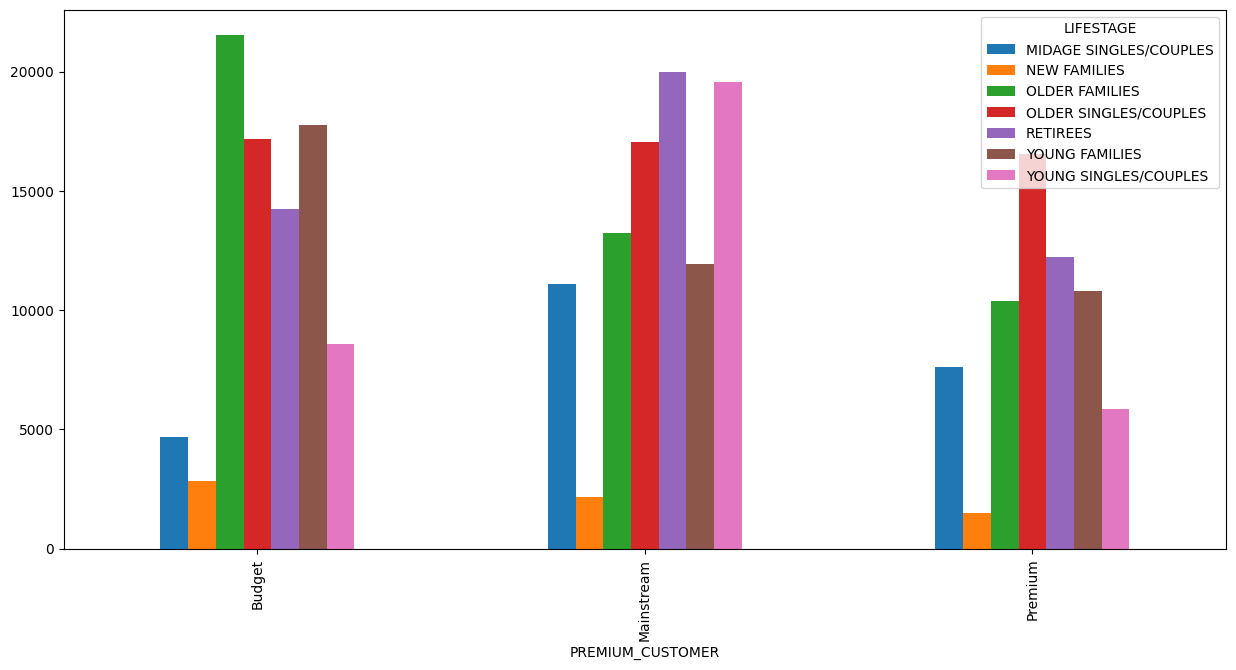

In [75]:
df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().unstack().plot(kind='bar', figsize=(15,7), stacked=False)



<Axes: xlabel='LIFESTAGE'>

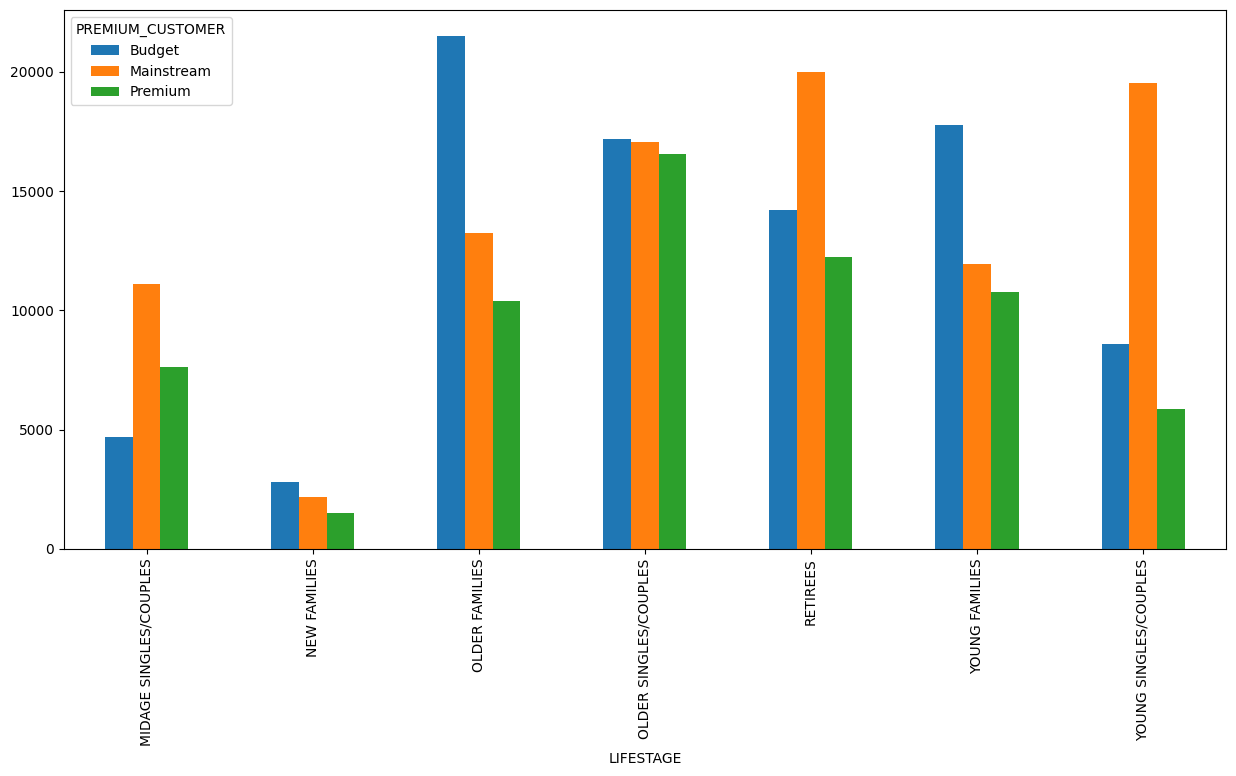

In [76]:
df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().unstack().plot(kind='bar', figsize=(15,7), stacked=False)

<Axes: xlabel='LIFESTAGE'>

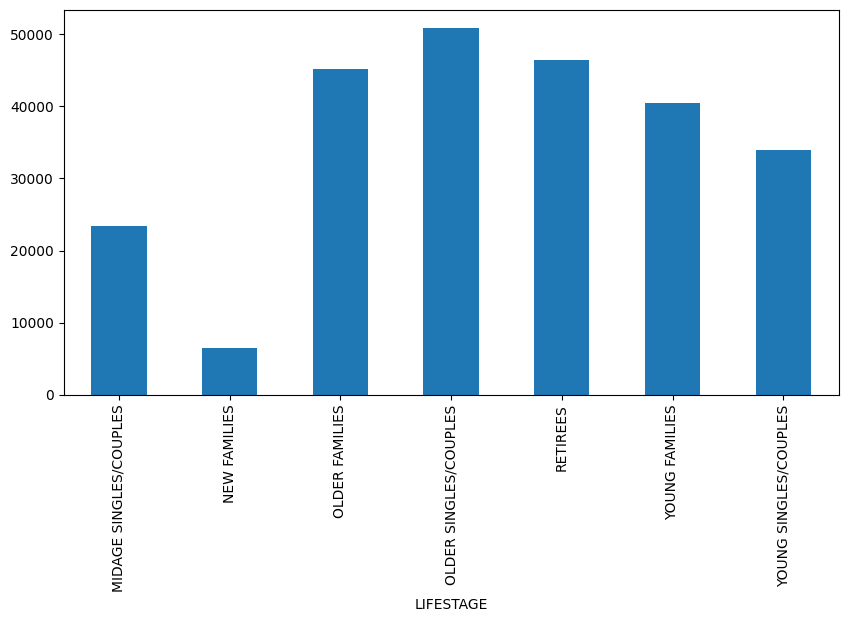

In [77]:

df.groupby(['LIFESTAGE']).size().plot(kind='bar', figsize=(10,5), stacked=False)


<Axes: xlabel='PREMIUM_CUSTOMER'>

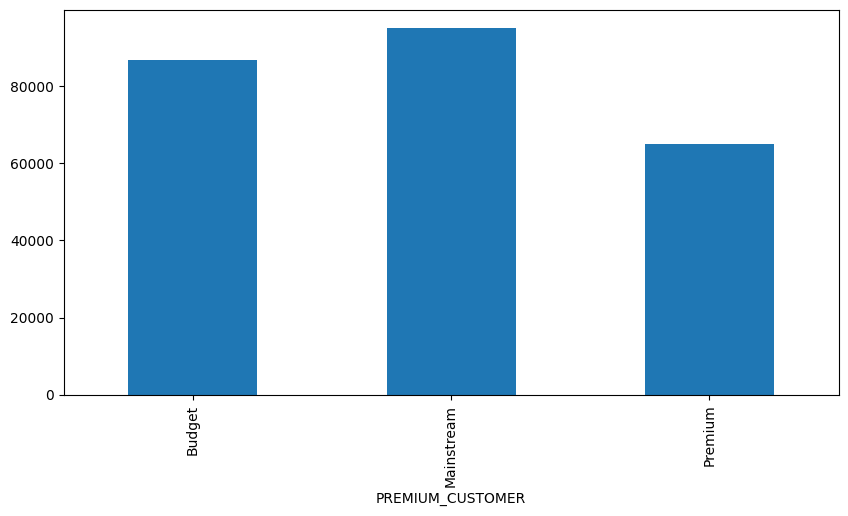

In [78]:
df.groupby(['PREMIUM_CUSTOMER']).size().plot(kind='bar', figsize=(10,5), stacked=False)


* Older singles/couples spend more on chips, new families spend the least amount on chips. Low number of new families, may be the reason.

In [79]:
grouped_multiple = df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({'TOT_SALES': ['mean', 'min', 'max','sum', 'count']})
grouped_multiple.columns = ['Sales_mean', 'Sales_min', 'Sales_max', 'Sales_tot', 'Sales_num']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

,PREMIUM_CUSTOMER,LIFESTAGE,Sales_mean,Sales_min,Sales_max,Sales_tot,Sales_num
0,Budget,MIDAGE SINGLES/COUPLES,7.108442,1.7,28.5,33345.70,4691
1,Budget,NEW FAMILIES,7.297256,1.7,27.0,20607.45,2824
2,Budget,OLDER FAMILIES,7.291241,1.7,28.5,156863.75,21514
3,Budget,OLDER SINGLES/COUPLES,7.444305,1.7,28.5,127833.60,17172
4,Budget,RETIREES,7.445786,1.7,28.5,105916.30,14225
5,Budget,YOUNG FAMILIES,7.302705,1.7,29.5,129717.95,17763
6,Budget,YOUNG SINGLES/COUPLES,6.663023,1.7,27.0,57122.10,8573
7,Mainstream,MIDAGE SINGLES/COUPLES,7.637156,1.7,29.5,84734.25,11095
8,Mainstream,NEW FAMILIES,7.313364,1.7,23.0,15979.70,2185
9,Mainstream,OLDER FAMILIES,7.281440,1.7,29.5,96413.55,13241


In [81]:
grouped_multiple.sort_values('Sales_tot',ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,Sales_mean,Sales_min,Sales_max,Sales_tot,Sales_num
2,Budget,OLDER FAMILIES,7.291241,1.7,28.5,156863.75,21514
13,Mainstream,YOUNG SINGLES/COUPLES,7.551279,1.7,27.0,147582.20,19544
11,Mainstream,RETIREES,7.269352,1.7,29.5,145168.95,19970
5,Budget,YOUNG FAMILIES,7.302705,1.7,29.5,129717.95,17763
3,Budget,OLDER SINGLES/COUPLES,7.444305,1.7,28.5,127833.60,17172
10,Mainstream,OLDER SINGLES/COUPLES,7.306049,1.7,28.5,124648.50,17061
17,Premium,OLDER SINGLES/COUPLES,7.459997,1.7,29.5,123537.55,16560
4,Budget,RETIREES,7.445786,1.7,28.5,105916.30,14225
9,Mainstream,OLDER FAMILIES,7.281440,1.7,29.5,96413.55,13241
18,Premium,RETIREES,7.461315,1.7,29.5,91296.65,12236


## Findings
* Budget category, older families are the largest consumer of chips
Followed by Mainstream, YOUNG SINGLES/COUPLES and Mainstream, RETIREES
* New families in all three categories Budget, Mainstream and Premium spend the least on chips

In [82]:

grouped_multiple.sort_values('Sales_mean', ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,Sales_mean,Sales_min,Sales_max,Sales_tot,Sales_num
7,Mainstream,MIDAGE SINGLES/COUPLES,7.637156,1.7,29.5,84734.25,11095
13,Mainstream,YOUNG SINGLES/COUPLES,7.551279,1.7,27.0,147582.20,19544
18,Premium,RETIREES,7.461315,1.7,29.5,91296.65,12236
17,Premium,OLDER SINGLES/COUPLES,7.459997,1.7,29.5,123537.55,16560
4,Budget,RETIREES,7.445786,1.7,28.5,105916.30,14225
3,Budget,OLDER SINGLES/COUPLES,7.444305,1.7,28.5,127833.60,17172
8,Mainstream,NEW FAMILIES,7.313364,1.7,23.0,15979.70,2185
10,Mainstream,OLDER SINGLES/COUPLES,7.306049,1.7,28.5,124648.50,17061
5,Budget,YOUNG FAMILIES,7.302705,1.7,29.5,129717.95,17763
1,Budget,NEW FAMILIES,7.297256,1.7,27.0,20607.45,2824


## Findings


* Mainstream, MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES and Premium, RETIREE buy chips less frequently but in higher ticket size.

* Per transaction spend on chips is lowest for Budget, MIDAGE SINGLES/COUPLES and Premium, YOUNG SINGLES/COUPLES

In [83]:

# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER Over to you!
# Calculate and plot the average number of units per customer by those two dimensions.

df['PROD_QTY'].value_counts() # Most of the transactions have 1 or 2 units of PROD_QTY


PROD_QTY
2    220070
1     25476
5       415
3       408
4       371
Name: count, dtype: int64

In [84]:

# Lets look at the PROD_QTY * SIZE = VOLUME
df['VOL'] = df['PROD_QTY'] * df['size']
df['VOL'].describe()

count    246740.000000
mean        334.822631
std         130.229616
min          70.000000
25%         268.000000
50%         330.000000
75%         350.000000
max        1900.000000
Name: VOL, dtype: float64

<Axes: ylabel='VOL'>

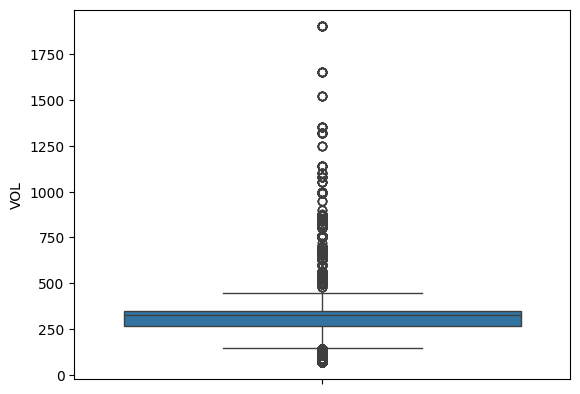

In [85]:

sns.boxplot(df['VOL'])
# Strong case of outliers or is it a class case?

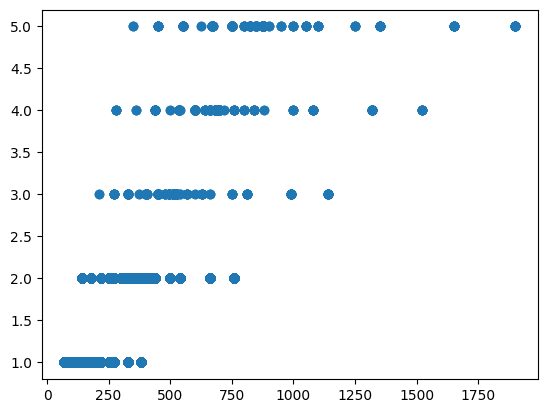

In [86]:

plt.scatter(df['VOL'],df['PROD_QTY'])

<Axes: xlabel='VOL'>

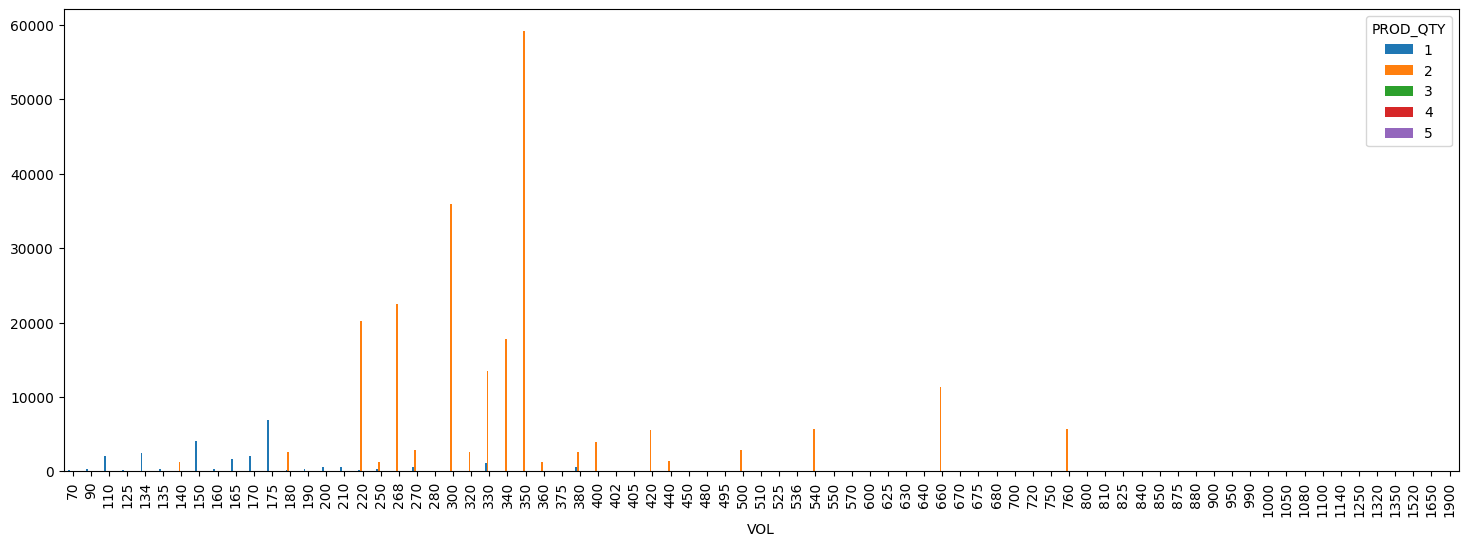

In [87]:
df.groupby(['VOL','PROD_QTY']).size().unstack().plot(kind='bar', figsize=(18,6), stacked=False)

In [88]:
df[df['PROD_QTY']==5]['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER FAMILIES            97
YOUNG FAMILIES            89
OLDER SINGLES/COUPLES     72
RETIREES                  69
MIDAGE SINGLES/COUPLES    46
YOUNG SINGLES/COUPLES     35
NEW FAMILIES               7
Name: count, dtype: int64

In [89]:
df[df['PROD_QTY']==5]['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    148
Budget        143
Premium       124
Name: count, dtype: int64

<Axes: xlabel='LIFESTAGE'>

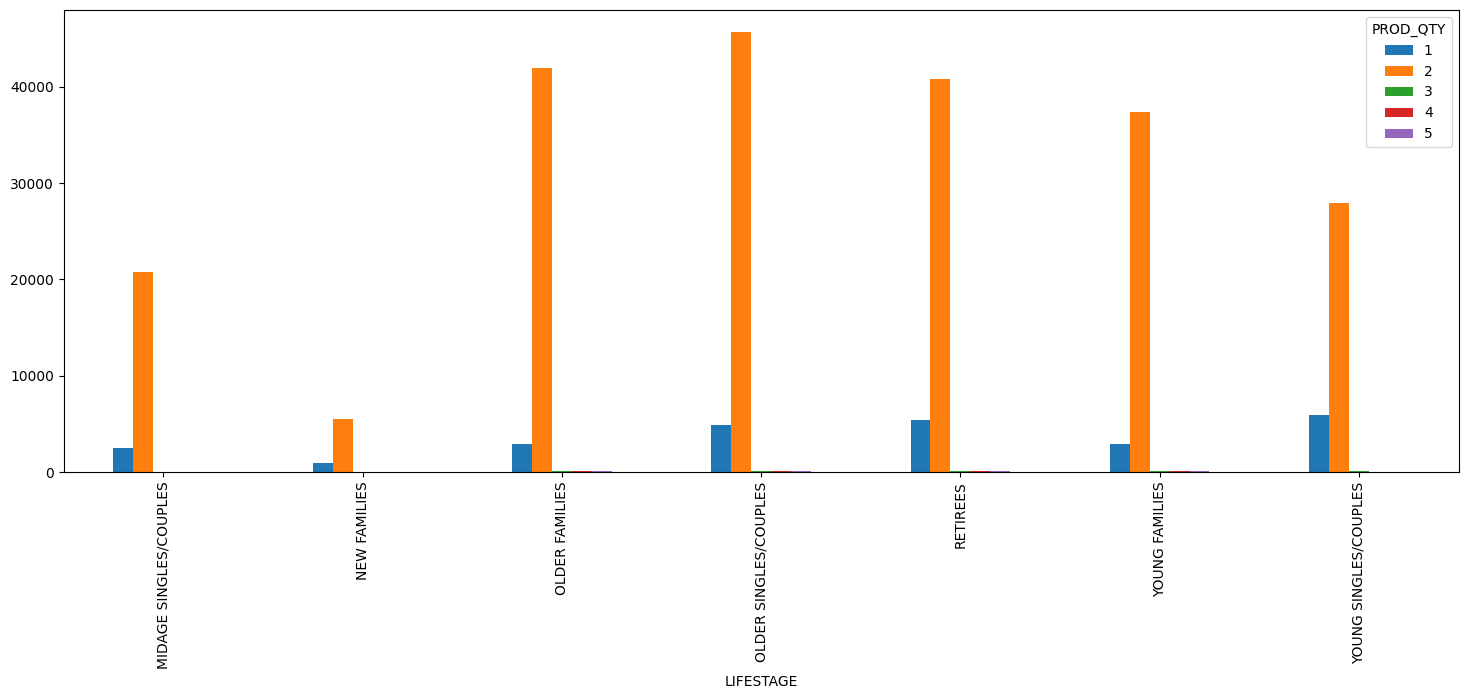

In [90]:
df.groupby(['LIFESTAGE','PROD_QTY']).size().unstack().plot(kind='bar', figsize=(18,6), stacked=False)

<Axes: xlabel='PREMIUM_CUSTOMER'>

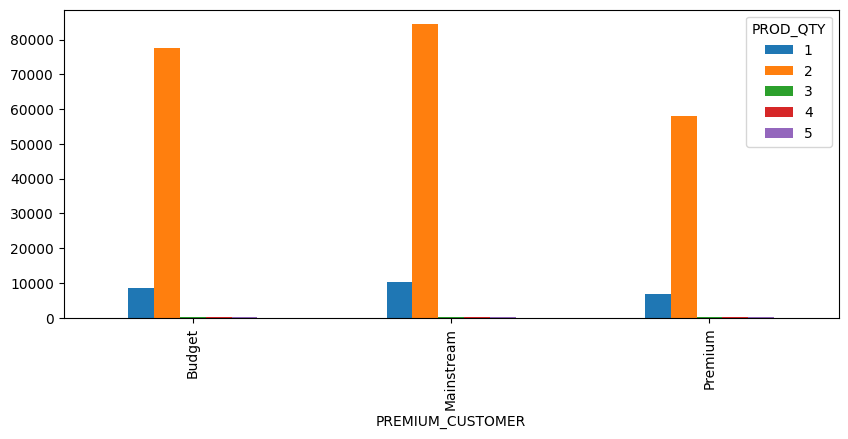

In [91]:
df.groupby(['PREMIUM_CUSTOMER','PROD_QTY']).size().unstack().plot(kind='bar', figsize=(10,4), stacked=False)

In [92]:

grouped_multiple = df.groupby(['LIFESTAGE']).agg({'VOL': ['mean', 'min', 'max', 'sum', 'count']})
grouped_multiple.columns = ['VOL_mean', 'VOL_min', 'VOL_max', 'VOL_tot', 'VOL_num']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple.sort_values('VOL_tot')

,LIFESTAGE,VOL_mean,VOL_min,VOL_max,VOL_tot,VOL_num
1,NEW FAMILIES,325.745883,70,1900,2116371,6497
0,MIDAGE SINGLES/COUPLES,334.864219,70,1900,7835153,23398
6,YOUNG SINGLES/COUPLES,323.595278,70,1350,10992208,33969
5,YOUNG FAMILIES,339.367314,70,1900,13742340,40494
2,OLDER FAMILIES,341.065127,70,1900,15401819,45158
4,RETIREES,332.953802,70,1900,15459378,46431
3,OLDER SINGLES/COUPLES,336.008249,70,1900,17066867,50793


In [93]:

grouped_multiple = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'VOL': ['mean', 'min', 'max', 'sum', 'count']})
grouped_multiple.columns = ['VOL_mean', 'VOL_min', 'VOL_max', 'VOL_tot', 'VOL_num']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple.sort_values('VOL_tot')


,LIFESTAGE,PREMIUM_CUSTOMER,VOL_mean,VOL_min,VOL_max,VOL_tot,VOL_num
5,NEW FAMILIES,Premium,326.887097,70,760,486408,1488
4,NEW FAMILIES,Mainstream,326.683753,70,1900,713804,2185
3,NEW FAMILIES,Budget,324.418909,70,1350,916159,2824
0,MIDAGE SINGLES/COUPLES,Budget,329.989554,70,1650,1547981,4691
20,YOUNG SINGLES/COUPLES,Premium,314.761791,70,1100,1841986,5852
2,MIDAGE SINGLES/COUPLES,Premium,330.260378,70,1650,2513942,7612
18,YOUNG SINGLES/COUPLES,Budget,313.940628,70,1080,2691413,8573
8,OLDER FAMILIES,Premium,339.512641,70,1900,3531950,10403
17,YOUNG FAMILIES,Premium,338.440189,70,1350,3649739,10784
1,MIDAGE SINGLES/COUPLES,Mainstream,340.083822,70,1900,3773230,11095


## Findings

* Volume purchase is higher for Budget-Older Families,
Mainstream-Retirees, Mainstream - Young Singles/Couples, Budget-Young Families
* New Families are low volume users
* Mainstream users consume more chips
Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

* Calculate and plot the average price per unit sold (average sale price) by those two customer dimensions

In [94]:
df['AVG_PRICE'] = df['TOT_SALES']/df['PROD_QTY']

In [95]:
df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'AVG_PRICE': ['mean', 'min', 'max', 'sum', 'count']})

AVG_PRICE                            
                                             mean   min  max       sum  count
LIFESTAGE              PREMIUM_CUSTOMER                                      
MIDAGE SINGLES/COUPLES Budget            3.743328  1.45  6.5  17559.95   4691
                       Mainstream        3.994241  1.70  6.5  44316.10  11095
                       Premium           3.770698  1.35  6.5  28702.55   7612
NEW FAMILIES           Budget            3.917688  1.70  6.5  11063.55   2824
                       Mainstream        3.916133  1.70  6.5   8556.75   2185
                       Premium           3.872110  1.70  6.5   5761.70   1488
OLDER FAMILIES         Budget            3.745340  1.70  6.5  80577.25  21514
                       Mainstream        3.737077  1.44  6.5  49482.64  13241
                       Premium           3.717000  1.70  6.5  38667.95  10403
OLDER SINGLES/COUPLES  Budget            3.882096  1.70  6.5  66663.35  17172
                       Mainstream        3.814665  1.70  6.5  65082.00  17061
                       Premium           3.893182  1.70  6.5  64471.10  16560
RETIREES               Budget            3.924404  1.65  6.5  55824.65  14225
                       Mainstream        3.844294  1.70  6.5  76770.55  19970
                       Premium           3.920942  1.70  6.5  47976.65  12236
YOUNG FAMILIES         Budget            3.760737  1.32  6.5  66801.97  17763
                       Mainstream        3.724533  1.35  6.5  44497.00  11947
                       Premium           3.762150  1.48  6.5  40571.03  10784
YOUNG SINGLES/COUPLES  Budget            3.657366  1.70  6.5  31354.60   8573
                       Mainstream        4.065642  1.70  6.5  79458.90  19544
                       Premium           3.665414  1.70  6.5  21450.00   5852